Import packages

In [29]:
from google.colab import drive
drive.mount('/content/drive')


import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from skimage.io import imread
from skimage.transform import resize

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Mount Google Drive to access uploaded files

In [30]:
# Set the path to your dataset
path_to_dataset = '/content/drive/MyDrive/Colab Notebooks/Alzheimer Dataset'

Efficient Dataset Loading and Preprocessing Function

In [31]:
# Function to load and preprocess the dataset
def load_and_preprocess_dataset(folder):
    data = []
    labels = []

    for class_folder in os.listdir(os.path.join(path_to_dataset, folder)):
        class_path = os.path.join(path_to_dataset, folder, class_folder)

        for image_file in os.listdir(class_path):
            image_path = os.path.join(class_path, image_file)
            image = imread(image_path, as_gray=True)
            image = resize(image, (100, 100))  # Adjust the size as needed
            flattened_image = image.flatten()

            data.append(flattened_image)
            labels.append(class_folder)

    return np.array(data), np.array(labels)

In [32]:
# Load and preprocess the training dataset
train_data, train_labels = load_and_preprocess_dataset('train')


In [33]:
# Load and preprocess the testing dataset
test_data, test_labels = load_and_preprocess_dataset('test')

In [34]:
# Encode labels
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
test_labels_encoded = label_encoder.transform(test_labels)


In [35]:
# Normalize pixel values
scaler = StandardScaler()
train_data_normalized = scaler.fit_transform(train_data)
test_data_normalized = scaler.transform(test_data)


In [36]:
# Split the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(
    train_data_normalized, train_labels_encoded, test_size=0.2, random_state=42
)


In [37]:
# Train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can experiment with different values of k
knn_model.fit(X_train, y_train)


KNeighborsClassifier()

Evaluating Model Performance on Validation Set






In [38]:
# Predict on the validation set
y_pred = knn_model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy}")

Validation Accuracy: 0.9873170731707317


Assessing Model Performance on Test Set

In [39]:
# Predict on the test set
test_predictions = knn_model.predict(test_data_normalized)

# Evaluate the model on the test set
test_accuracy = accuracy_score(test_labels_encoded, test_predictions)
print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 0.7083659108678655


Optimizing KNN Hyperparameters with GridSearchCV

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

# Hyperparameter tuning for KNN using GridSearchCV
param_grid = {'n_neighbors': [3, 5, 7, 9]}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_k = grid_search.best_params_['n_neighbors']

Training KNN Model with Optimized Hyperparameters and Assessing Performance

In [41]:
# Train the KNN model with the best hyperparameters
knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(X_train, y_train)

# Predict on the validation set
y_pred = knn_model.predict(X_val)

# Evaluate the model with the best hyperparameters
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy with Best k ({best_k}): {accuracy}")

# Predict on the test set
test_predictions = knn_model.predict(test_data_normalized)

# Evaluate the model on the test set
test_accuracy = accuracy_score(test_labels_encoded, test_predictions)
print(f"Test Accuracy: {test_accuracy}")

Validation Accuracy with Best k (3): 0.9951219512195122
Test Accuracy: 0.7200938232994527



Analyzing Model Performance with Confusion Matrix and Classification Report

In [42]:
# Display confusion matrix and classification report
conf_matrix = confusion_matrix(test_labels_encoded, test_predictions)
class_report = classification_report(test_labels_encoded, test_predictions, target_names=label_encoder.classes_)

print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[ 90   0  25  64]
 [  4   4   4   0]
 [ 52   1 472 115]
 [ 38   0  55 355]]

Classification Report:
                  precision    recall  f1-score   support

    MildDemented       0.49      0.50      0.50       179
ModerateDemented       0.80      0.33      0.47        12
     NonDemented       0.85      0.74      0.79       640
VeryMildDemented       0.66      0.79      0.72       448

        accuracy                           0.72      1279
       macro avg       0.70      0.59      0.62      1279
    weighted avg       0.73      0.72      0.72      1279



Sensitivity (Recall): 0.50
Specificity: 1.00


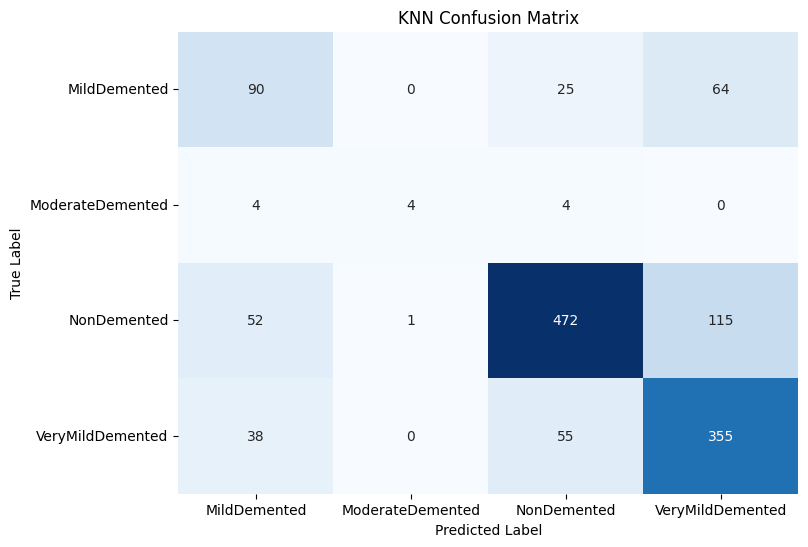

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are the true labels and predicted labels, respectively
conf_matrix_knn = confusion_matrix(test_labels_encoded, test_predictions)

# Calculate True Positive (TP), True Negative (TN), False Positive (FP), False Negative (FN)
TP = conf_matrix_knn[1, 1]
TN = conf_matrix_knn[0, 0]
FP = conf_matrix_knn[0, 1]
FN = conf_matrix_knn[1, 0]

# Calculate sensitivity (recall)
sensitivity_knn = TP / (TP + FN)

# Calculate specificity
specificity_knn = TN / (TN + FP)

# Display the results
print(f'Sensitivity (Recall): {sensitivity_knn:.2f}')
print(f'Specificity: {specificity_knn:.2f}')

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [44]:
from skimage.io import imread
from skimage.transform import resize

# Load and preprocess the new image
new_image_path = '/content/drive/MyDrive/example data/example data/moderateDem0.jpg'
new_image = imread(new_image_path, as_gray=True)
new_image_resized = resize(new_image, (100, 100)).flatten()  # Resize and flatten the image

# Normalize the pixel values using the same scaler used during training
new_image_normalized = scaler.transform([new_image_resized])

# Predict the class using the trained KNN model
new_image_prediction = knn_model.predict(new_image_normalized)

# Decode the predicted label
predicted_class = label_encoder.classes_[new_image_prediction[0]]

print(f'The predicted class for the new image is: {predicted_class}')


The predicted class for the new image is: ModerateDemented


In [45]:
from skimage.io import imread
from skimage.transform import resize

# Load and preprocess the new image
new_image_path = '/content/drive/MyDrive/example data/example data/MRI.jpg'
new_image = imread(new_image_path, as_gray=True)
new_image_resized = resize(new_image, (100, 100)).flatten()  # Resize and flatten the image

# Normalize the pixel values using the same scaler used during training
new_image_normalized = scaler.transform([new_image_resized])

# Predict the class using the trained KNN model
new_image_prediction = knn_model.predict(new_image_normalized)

# Decode the predicted label
predicted_class = label_encoder.classes_[new_image_prediction[0]]

print(f'The predicted class for the new image is: {predicted_class}')


The predicted class for the new image is: NonDemented


Class Prediction for New Image Using Trained Model

In [46]:
from skimage.io import imread
from skimage.transform import resize

# Load and preprocess the new image
new_image_path = '/content/drive/MyDrive/Colab Notebooks/Alzheimer Dataset/train/NonDemented/nonDem2.jpg'
new_image = imread(new_image_path, as_gray=True)
new_image_resized = resize(new_image, (100, 100)).flatten()  # Resize and flatten the image

# Normalize the pixel values using the same scaler used during training
new_image_normalized = scaler.transform([new_image_resized])

# Predict the class using the trained KNN model
new_image_prediction = knn_model.predict(new_image_normalized)

# Decode the predicted label
predicted_class = label_encoder.classes_[new_image_prediction[0]]

print(f'The predicted class for the new image is: {predicted_class}')


The predicted class for the new image is: NonDemented


Classifying New Image Using Trained KNN Model

In [47]:
from skimage.io import imread
from skimage.transform import resize

# Load and preprocess the new image
new_image_path = '/content/drive/MyDrive/example data/example data/nd.png'
new_image = imread(new_image_path, as_gray=True)
new_image_resized = resize(new_image, (100, 100)).flatten()  # Resize and flatten the image

# Normalize the pixel values using the same scaler used during training
new_image_normalized = scaler.transform([new_image_resized])

# Predict the class using the trained KNN model
new_image_prediction = knn_model.predict(new_image_normalized)

# Decode the predicted label
predicted_class = label_encoder.classes_[new_image_prediction[0]]

print(f'The predicted class for the new image is: {predicted_class}')


The predicted class for the new image is: VeryMildDemented


Data Loading and Preprocessing Function

In [48]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Function to load and preprocess the dataset
def load_and_preprocess_dataset(folder):
    data = []
    labels = []

    for class_folder in os.listdir(os.path.join(path_to_dataset, folder)):
        class_path = os.path.join(path_to_dataset, folder, class_folder)

        for image_file in os.listdir(class_path):
            image_path = os.path.join(class_path, image_file)
            image = imread(image_path, as_gray=True)
            image = resize(image, (100, 100))  # Adjust the size as needed
            flattened_image = image.flatten()

            data.append(flattened_image)
            labels.append(class_folder)

    return np.array(data), np.array(labels)

# Load and preprocess the dataset
path_to_dataset = '/content/drive/MyDrive/Colab Notebooks/Alzheimer Dataset'
train_data, train_labels = load_and_preprocess_dataset('train')
test_data, test_labels = load_and_preprocess_dataset('test')

# Encode labels
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
test_labels_encoded = label_encoder.transform(test_labels)

# Normalize pixel values
scaler = StandardScaler()
train_data_normalized = scaler.fit_transform(train_data)
test_data_normalized = scaler.transform(test_data)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    train_data_normalized, train_labels_encoded, test_size=0.2, random_state=42
)

# Apply data augmentation to the training set
augmented_data = []
augmented_labels = []

for i in range(len(X_train)):
    augmented_data.append(X_train[i])
    augmented_labels.append(y_train[i])

    # Add rotated versions of the images
    rotated_image = np.rot90(X_train[i].reshape(100, 100)).flatten()
    augmented_data.append(rotated_image)
    augmented_labels.append(y_train[i])

# Create a KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Fit the KNN model on the training data
knn_model.fit(np.array(augmented_data), np.array(augmented_labels))

# Use StratifiedKFold for cross-validation
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(knn_model, train_data_normalized, train_labels_encoded, cv=stratified_kfold)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))
print("Standard Deviation of Accuracy:", np.std(cv_scores))

# Predict on the test set
test_predictions = knn_model.predict(test_data_normalized)

# Evaluate the model on the test set
test_accuracy = accuracy_score(test_labels_encoded, test_predictions)
print(f"Test Accuracy: {test_accuracy}")

# Compare training and test accuracies
training_accuracy = np.mean(cv_scores)
print(f"Training Accuracy: {training_accuracy}")

# Check for overfitting by comparing training and test accuracies
overfitting_indicator = training_accuracy - test_accuracy
if overfitting_indicator < 0:
    print("The model is potentially overfitting.")
else:
    print("The model is generalizing well to the test set.")


Cross-Validation Scores: [0.97268293 0.97658537 0.97363281 0.98046875 0.98632812]
Mean Accuracy: 0.9779395960365853
Standard Deviation of Accuracy: 0.004995576701747472
Test Accuracy: 0.7083659108678655
Training Accuracy: 0.9779395960365853
The model is generalizing well to the test set.


Image Classification Using Trained KNN Model

In [49]:
from skimage.io import imread
from skimage.transform import resize

# Load and preprocess the new image
new_image_path = '/content/drive/MyDrive/example data/example data/nd.png'
new_image = imread(new_image_path, as_gray=True)
new_image_resized = resize(new_image, (100, 100)).flatten()  # Resize and flatten the image

# Normalize the pixel values using the same scaler used during training
new_image_normalized = scaler.transform([new_image_resized])

# Predict the class using the trained KNN model
new_image_prediction = knn_model.predict(new_image_normalized)

# Decode the predicted label
predicted_class = label_encoder.classes_[new_image_prediction[0]]

print(f'The predicted class for the new image is: {predicted_class}')


The predicted class for the new image is: NonDemented


Image Classification with Trained KNN Model

In [50]:
from skimage.io import imread
from skimage.transform import resize

# Load and preprocess the new image
new_image_path = '/content/drive/MyDrive/example data/example data/vmd.png'
new_image = imread(new_image_path, as_gray=True)
new_image_resized = resize(new_image, (100, 100)).flatten()  # Resize and flatten the image

# Normalize the pixel values using the same scaler used during training
new_image_normalized = scaler.transform([new_image_resized])

# Predict the class using the trained KNN model
new_image_prediction = knn_model.predict(new_image_normalized)

# Decode the predicted label
predicted_class_index = new_image_prediction[0]
predicted_class = label_encoder.classes_[predicted_class_index]

print(f'The predicted class for the new image is: {predicted_class}')



The predicted class for the new image is: NonDemented



Enhancing KNN Performance with GridSearchCV and Data Augmentation

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from skimage.transform import rotate

# Function to perform data augmentation
def augment_data(data, labels):
    augmented_data = []
    augmented_labels = []

    for i in range(len(data)):
        augmented_data.append(data[i])
        augmented_labels.append(labels[i])

        # Add rotated versions of the images
        rotated_image = rotate(data[i].reshape(100, 100), angle=45, mode='reflect').flatten()
        augmented_data.append(rotated_image)
        augmented_labels.append(labels[i])

    return np.array(augmented_data), np.array(augmented_labels)

# Hyperparameter tuning for KNN
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=stratified_kfold)
grid_search.fit(train_data_normalized, train_labels_encoded)

# Get the best hyperparameters
best_k = grid_search.best_params_['n_neighbors']

# Perform data augmentation
augmented_train_data, augmented_train_labels = augment_data(X_train, y_train)

# Train the KNN model with the best hyperparameters
knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(augmented_train_data, augmented_train_labels)

# Predict on the validation set
y_pred = knn_model.predict(X_val)

# Evaluate the model
validation_accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy after Hyperparameter Tuning and Data Augmentation: {validation_accuracy}")

# Predict on the test set
test_predictions = knn_model.predict(test_data_normalized)

# Evaluate the model on the test set
test_accuracy = accuracy_score(test_labels_encoded, test_predictions)
print(f"Test Accuracy after Hyperparameter Tuning and Data Augmentation: {test_accuracy}")


Validation Accuracy after Hyperparameter Tuning and Data Augmentation: 0.9951219512195122
Test Accuracy after Hyperparameter Tuning and Data Augmentation: 0.7200938232994527


In [52]:
from skimage.io import imread
from skimage.transform import resize

# Load and preprocess the new image
new_image_path = '/content/drive/MyDrive/example data/example data/vmd.png'
new_image = imread(new_image_path, as_gray=True)
new_image_resized = resize(new_image, (100, 100)).flatten()  # Resize and flatten the image

# Normalize the pixel values using the same scaler used during training
new_image_normalized = scaler.transform([new_image_resized])

# Predict the class using the trained KNN model
new_image_prediction = knn_model.predict(new_image_normalized)

# Decode the predicted label
predicted_class = label_encoder.classes_[new_image_prediction[0]]

print(f'The predicted class for the new image is: {predicted_class}')


The predicted class for the new image is: VeryMildDemented


In [53]:
from skimage.io import imread
from skimage.transform import resize

# Load and preprocess the new image
new_image_path = '/content/drive/MyDrive/example data/example data/md.png'
new_image = imread(new_image_path, as_gray=True)
new_image_resized = resize(new_image, (100, 100)).flatten()  # Resize and flatten the image

# Normalize the pixel values using the same scaler used during training
new_image_normalized = scaler.transform([new_image_resized])

# Predict the class using the trained KNN model
new_image_prediction = knn_model.predict(new_image_normalized)

# Decode the predicted label
predicted_class = label_encoder.classes_[new_image_prediction[0]]

print(f'The predicted class for the new image is: {predicted_class}')


The predicted class for the new image is: VeryMildDemented
